# 세일즈 데이터 분석을 통한 마케팅 믹스 모델링
미디어별 광고비와 세일즈 데이터를 가지고 최적의 마케팅 믹스를 구해봅니다.

## 데이터 설명
데이터는 [다음의 링크](https://drive.google.com/file/d/14ybcUiuv3tjlciixMkLh2LoEM5AE3UnG/view?usp=sharing)에서 다운받으실 수 있습니다(https://www.kaggle.com/sazid28/advertising.csv/).


---





  * **TV** - TV 매체비 입니다. 
  * **radio** - 라디오 매체비 입니다. 
  * **newspaper** - 신문 매체비 입니다. 
  * **sales** - 매출액 입니다. 


---







## 문제 정의 
*  전제
  * 실제로는 광고 매체비 이와의 많은 요인이 매출에 영향을 미칩니다. (e.g. 영업인력 수, 입소문, 경기, 유행 등) 
  * 본 분석에서는 다른 요인이 모두 동일한 상황에서 매체비만 변경했을 때 매출액의 변화가 발생한 것이라고 간주해봅니다. 
  * 실제로 Acquisition 단계에서는 종속변수가 매출액보다는 방문자수, 가입자수, DAU, MAU 등의 지표가 될 것입니다. 
  * 여러분은 지금 2011년에 있다고 상상합니다. 
* 분석의 목적 
  * 각 미디어별로 매체비를 어떻게 쓰느냐에 따라서 매출액이 어떻게 달라질지 예측합니다. 
  * 궁극적으로는 매출액을 최대화할 수 있는 미디어 믹스의 구성을 도출합니다. 
  * 이 미디어믹스는 향후 미디어 플랜을 수립할 때 사용될 수 있습니다. 


### 데이터 탐색

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 데이터를 불러옵니다.
# from google.colab import files
# uploaded = files.upload()

In [3]:
os.environ['KAGGLE_USERNAME'] = "hwankihan"
os.environ['KAGGLE_KEY'] = "bf2898a338529cdfeb184d116e2cd40f"

In [4]:
!kaggle datasets download -d sazid28/advertising.csv
!unzip '*.zip'

  0% 0.00/2.18k [00:00<?, ?B/s]
100% 2.18k/2.18k [00:00<00:00, 5.05MB/s]
Archive:  advertising.csv.zip
  inflating: Advertising.csv         


In [7]:
# 데이터를 확인 합니다. 
df = pd.read_csv('Advertising.csv')
print(df.shape)
df.tail()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
# 결측값이 있는지 확인합니다. 
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
# 분석에 필요한 컬럼만 선택합니다. 
df= df[['TV', 'radio', 'newspaper', 'sales']]
print(df.shape)
df.tail()

(200, 4)


,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
# 기술통계를 확인합니다. 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


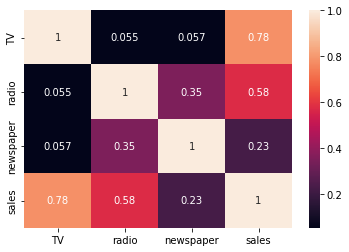

In [19]:
# 변수간의 correlation을 확인합니다. 
corr=df.corr()
sns.heatmap(corr, annot=True)

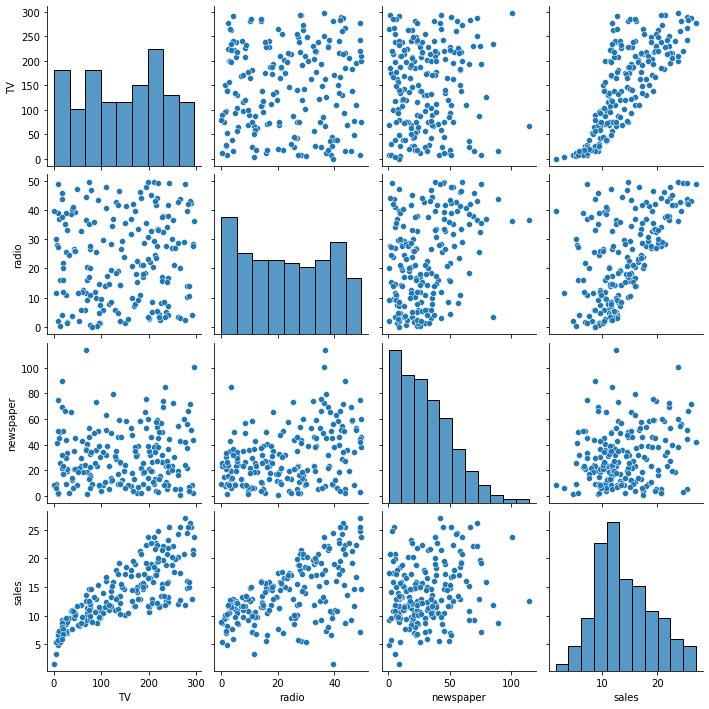

In [20]:
# 변수간의 pairplot을 그려봅니다. 
sns.pairplot(data=df)
plt.show()

In [21]:
# Labels와 features를 지정해줍니다. 
Labels = df["sales"]
features = df[["TV", "radio", "newspaper"]]

In [ ]:
print(Labels.shape)
Labels

In [ ]:
print(features.shape)
features

## 데이터 분석

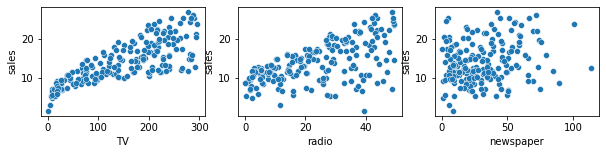

In [30]:
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)
# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(10, 2)
# 미디어별 매체비 분포를 scatterplot으로 시각화해봅니다. 
sns.scatterplot(data=df, x="TV", y="sales",ax=ax1)
sns.scatterplot(data=df, x="radio", y="sales",ax=ax2)
sns.scatterplot(data=df, x="newspaper", y="sales",ax=ax3)

# TV가 가장 관계가 있어보임

매출액과의 scatter plot을 보면, TV가 매출액과 가장 관련이 높은 것 같아 보입니다. 
라디오도 관련이 있지만 신문의 상관관계는 애매해 보입니다. 

### 선형회귀 분석 (stats model)

In [32]:
# stats model의 ols를 사용하여 선형회귀분석을 합니다. 
import statsmodels.formula.api as sm
model1 = sm.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        07:55:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### stats model 선형회귀 결과 해석 
  * R-Square 0.897로 매우 높은 편
  * P-value 0.05수준에서 유의한 변수는 TV, radio 입니다. 
  * newspaper는 유의하지 않는 것으로 나타났습니다. 즉, 신문광고가 매출액에 미치는 영향은 유의하지 않다고 할 수 있습니다. 
  * 회귀식은 다음과 같습니다. 
    sales = 2.9389 + 0.0458*TV + 0.1885*radio - 0.001*newspapaer 

### 선형회귀 분석 (sklearn)

In [33]:
# sklearn의 선형회귀분석 결과와도 같습니다. 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(features, Labels)
print(model.intercept_, model.coef_)

2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


In [35]:
# 변수의 포함여부에 따른 ols 결과를 봅니다. 
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()
model2 = sm.ols(formula = "sales ~ TV + radio", data=df).fit()
model3 = sm.ols(formula = "sales ~ TV", data=df).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        07:57:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### 결과 해석 
  * 유의하지 않은 변수 newspaper를 제거한 model2의 AIC, BIC가 가장 낮습니다. 
  * 여러개의 모델 중 선택을 할 때 AIC, BIC가 가장 낮은지 여부로 정하기도 합니다. 
  * 물론 AIC, BIC가 유일한 판단기준은 아니고 RMSE, CFI 등 다른 기준들과 함께 고려되어야 합니다. 
  * 결과에 따르면 p-vlaue가 0.05 이상으로, 신문광고는 매출액 예측에 있어서 변수의 유무가 통계적으로 유의한 차이를 보이지 않습니다.  
  * 즉, 신문광고 마케팅과 매출액은 관련이 없다고 할 수 있습니다. 

In [36]:
# 각 미디어별 매체비에 따른 sales를 예측해봅니다. 
model1.predict({"TV" : 300, "radio": 10, "newspaper": 4})

0    18.549433
dtype: float64

In [37]:
sales = 2.9389 + 0.0458*300 + 0.1885*10 - 0.001*4
sales
# 예측 값이 거의 일치함

18.5599

In [38]:
model3.predict({"TV":[300, 10, 50]})

0    21.293586
1     7.507960
2     9.409426
dtype: float64

## 데이터 변환 후 재분석
  * 신문광고가 유의미하지 않다고 나왔지만 데이터의 문제일 수도 있다는 생각이 들었습니다. 
  * 여러분이 2011년에 살고 있다고 가정하고, 여러분의 상사는 여전히 신문광고가 유의미하다고 생각하고 있습니다. 
  * 분석결과에 대해 상사로부터 데이터 샘플수가 적거나 데이터 처리가 잘못되어서 이런 결과가 나온 것이 아니냐는 지적을 받았습니다. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

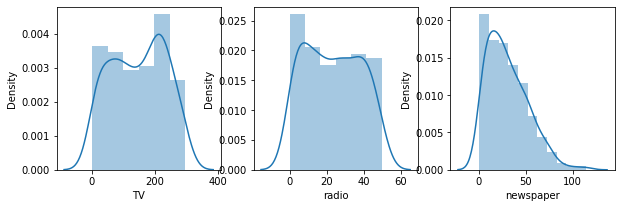

In [41]:
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(10, 3)


# 미디어별 매체비 분포를 seaborn의 distplot으로 시각화해봅니다. 
sns.distplot(df["TV"], ax=ax1)
sns.distplot(df["radio"], ax=ax2)
sns.distplot(df["newspaper"], ax=ax3)

In [42]:
# 데이터 분포를 보니 newspaper 값이 치우쳐져 있습니다. 
# 정규화를 위해 로그 변환을 해줍니다. 
import numpy as np

df["log_newspaper"] = np.log(df["newspaper"] + 1) # 무한소가 나오지않게 1보다 큰 양수로 될 수 있도록
print(df.shape)
df[["log_newspaper", "newspaper"]]

(200, 5)


,log_newspaper,newspaper
0,4.251348,69.2
1,3.830813,45.1
2,4.252772,69.3
3,4.085976,58.5
4,4.084294,58.4
...,...,...
195,2.694627,13.8
196,2.208274,8.1
197,2.001480,6.4
198,4.207673,66.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

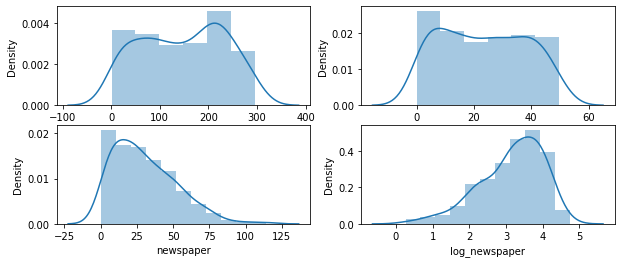

In [44]:
# 변환 결과를 시각화 해봅니다. 
# 4개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(10, 4)


# 미디어별 매체비 분포를 seaborn의 distplot으로 시각화해봅니다. 
sns.distplot(df["TV"], ax=ax1)
sns.distplot(df["radio"], ax=ax2)
sns.distplot(df["newspaper"], ax=ax3)
sns.distplot(df["log_newspaper"], ax=ax4)

In [46]:
# 변환한 newspaper 변수 결과도 포함하여 ols 분석 결과를 봅니다. 
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()
model4 = sm.ols(formula = "sales ~ TV + radio + log_newspaper", data=df).fit()
# print(model1.summary())
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.4
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.53e-96
Time:                        08:12:17   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8057      0.495      5.671

### 결과 해석 
  * 신문에 대한 상관계수는 음에서 양으로 변했지만 여전히 P-value 0.05수준에서 유의하지 않습니다.  
  * newspaper는 유의하지 않는 것으로 나타났습니다. 즉, 신문광고가 매출액에 미치는 영향은 유의하지 않다고 할 수 있습니다. 

### 추가 검증을 해본다면 
* 선형 회귀식 결과 진단 :
Residual의 분포를 통해 등분산성 검증, QQ plot을 통해 정규성 검증

### 선형회귀분석의 모델 평가 
* RMSE, MAE, MSE 가 주로 사용됨

# 적용 방안
  * 지금은 2011년이고 여러분의 상사는 여전히 신문광고가 유효하다고 생각하지만 데이터 분석결과는 그렇지 않습니다. 
  * 신문광고를 중단하고 TV, 라디오 광고 위주로 집행해야 합니다 .
  * 그런데 TV광고는 비용대비 효율은 조금 떨어지는 것 같습니다. 
  * 라디오 광고의 상관계수가 더 큽니다. 우리 제품은 라디오 광고를 할 수록 잘 팔리는 제품입니다. 